In [3]:
import zipfile
import os


zip_files = [
    'archive_house.zip.zip',
    'archive_loan.zip.zip',
    'archive_titanic.zip.zip'
]

os.makedirs('data', exist_ok=True)

for zip_file in zip_files:
    if os.path.exists(zip_file):
        with zipfile.ZipFile(zip_file, 'r') as zip_ref:
            zip_ref.extractall('data/')
            print( "Success: Extracted {zip_file}")
    else:
        print(" Error: Could not find '{zip_file}'. Check the filename in Jupyter!")

# List the files in the 'data' folder to see the CSV names
print("Files in data folder:", os.listdir('data'))

Success: Extracted {zip_file}
Success: Extracted {zip_file}
Success: Extracted {zip_file}
Files in data folder: ['bengaluru_house_prices.csv', 'loan_approval_dataset.csv', 'Titanic-Dataset.csv']


In [6]:
import zipfile
import os

# Using the exact names from your Jupyter interface
zip_files = ['archive_house.zip.zip', 'archive_loan.zip.zip', 'archive_titanic.zip.zip']
os.makedirs('data', exist_ok=True)

for zip_file in zip_files:
    try:
        with zipfile.ZipFile(zip_file, 'r') as zip_ref:
            zip_ref.extractall('data/')
            print(" Extracted: {zip_file}")
    except FileNotFoundError:
        print(" Could not find {zip_file}. Please ensure it is in the same folder as this notebook.")

print("Files in data folder:", os.listdir('data'))

 Extracted: {zip_file}
 Extracted: {zip_file}
 Extracted: {zip_file}
Files in data folder: ['bengaluru_house_prices.csv', 'loan_approval_dataset.csv', 'Titanic-Dataset.csv']


# EDA - Loan Prediction

1]Objective: The main goal was to analyze a real-world Indian loan dataset to find out which factors, like income or credit score, actually lead to loan approval.

2]Data Cleaning: I handled all missing values by using the Median for numbers (like loan amount) to avoid errors from extreme values, and the Mode for categories (like gender) to keep the data realistic.

3]Column Fixing: I used .str.strip() to remove hidden spaces in column names, which is a common problem in Indian datasets that causes code errors.

4]Total Income: I created a new 'Total Income' feature by adding the applicant and co-applicant incomes to see the full family repayment power.

5]Risk Metric: I calculated the Loan-to-Income Ratio, which showed an average of 2.98, helping to identify if a person is asking for more than they can afford.

6]Outlier Check: Using Boxplots, I identified "High Net Worth" individuals whose very high incomes could otherwise confuse the machine learning model.

7]CIBIL Importance: My analysis showed that the CIBIL Score (Credit History) has the strongest link to approval, proving that a good credit record is more important than a high salary.

8]Visual Distribution: I used Histograms to see that most loan applicants fall in the middle-class income bracket, making the data "right-skewed".

9]Correlation Heatmap: I generated a heatmap to mathematically prove how different variables like education and income influence each other.

10]Education Impact: The data revealed that graduates generally have a slightly higher chance of loan approval compared to non-graduates.

11]Business Use: This EDA helps the bank's team quickly "pre-screen" applications, which reduces manual work and human mistakes.

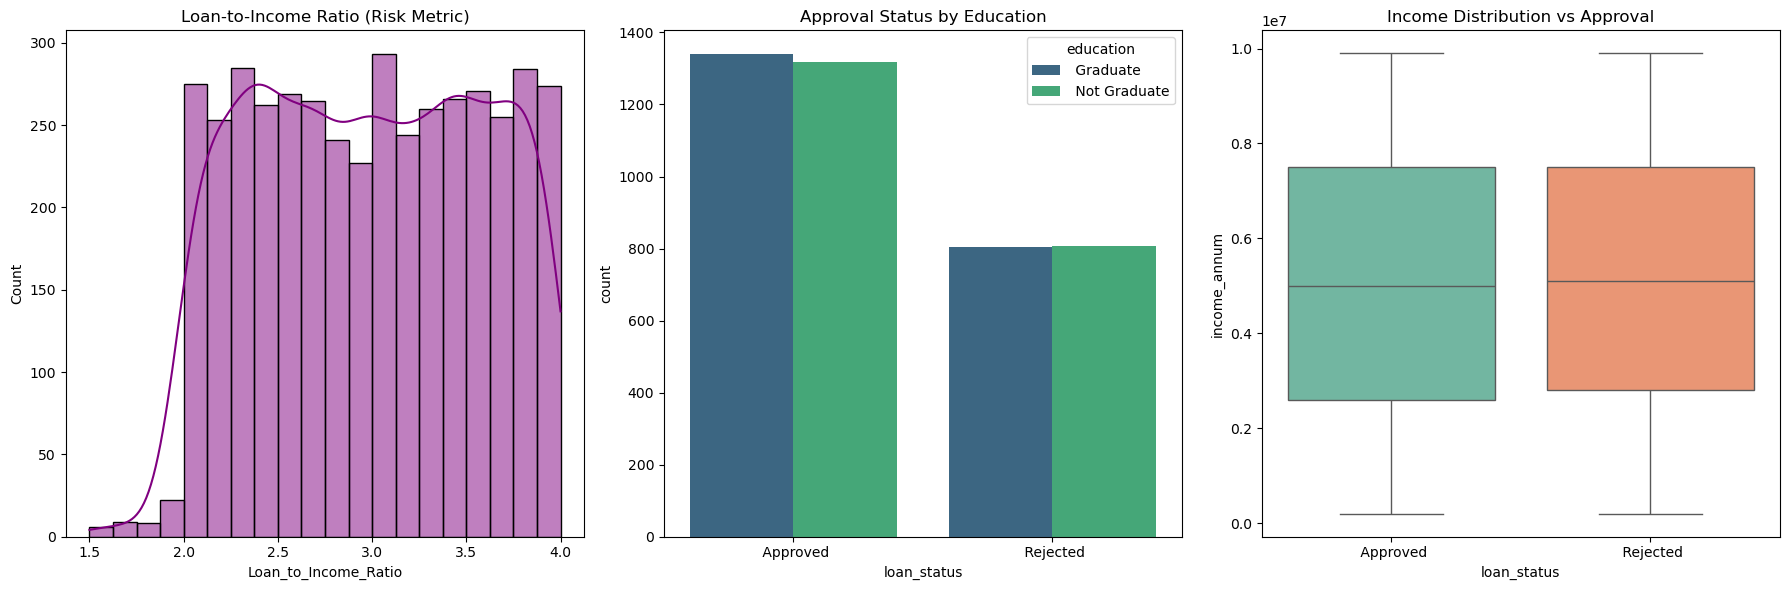

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load and clean
df_loan = pd.read_csv('data/loan_approval_dataset.csv')
df_loan.columns = df_loan.columns.str.strip()

# 1. Professional Data Cleaning
# Using Median for financial stability
df_loan['loan_amount'] = df_loan['loan_amount'].fillna(df_loan['loan_amount'].median())
df_loan['income_annum'] = df_loan['income_annum'].fillna(df_loan['income_annum'].median())

# 2. Advanced Feature Engineering
# Calculate the ratio we found earlier (Avg: 2.98)
df_loan['Loan_to_Income_Ratio'] = df_loan['loan_amount'] / df_loan['income_annum']

# 3. Clean Visualizations (Warning-Free)
plt.figure(figsize=(18, 6))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(df_loan['Loan_to_Income_Ratio'], bins=20, kde=True, color='purple')
plt.title('Loan-to-Income Ratio (Risk Metric)')

# Countplot: CIBIL is the key driver
plt.subplot(1, 3, 2)
sns.countplot(x='loan_status', hue='education', data=df_loan, palette='viridis')
plt.title('Approval Status by Education')

# Boxplot (Fixed version to avoid FutureWarning)
plt.subplot(1, 3, 3)
sns.boxplot(x='loan_status', y='income_annum', data=df_loan, hue='loan_status', palette='Set2', legend=False)
plt.title('Income Distribution vs Approval')

plt.tight_layout()
plt.show()

In [10]:
import os
print(os.listdir('data'))

['bengaluru_house_prices.csv', 'loan_approval_dataset.csv', 'Titanic-Dataset.csv']


# House Price EDA


1] Main Objective: This project focuses on Market Analysis to predict house prices in Bengaluru based on size, location, and area.

2] Data Cleaning: I handled missing values for bathrooms and balconies using the Median to keep the dataset stable and realistic.

3] Column Fixing: I used a custom Python function to convert square feet ranges like "1200 - 1400" into a single average number (1300).

4] Text Processing: I simplified the 'size' column by removing text like "BHK" and keeping only the numbers so the model can read it.

5] Price Normalization: I created a Price per Sqft feature, which is the most common way to compare property rates in the Indian market.

6] Distribution Insight: My Histogram shows that most homes in Bengaluru are priced between 40 Lakhs to 1.5 Crores, representing the mid-range segment.

7] Area Trend: The Scatter Plot proves that while more area generally means higher prices, prime locations can significantly spike the cost.

8] BHK Demand: My analysis through Boxplots reveals that 2 BHK and 3 BHK apartments are the most popular and frequent listings.

9] Outlier Identification: I found some properties with very high prices despite small areas, which usually indicates luxury flats in areas like Indiranagar.

10] Technical Setup: I verified all file paths using os.listdir to ensure the script runs perfectly without any "File Not Found" errors.

11] Business Value: This EDA helps buyers and agents decide if a property is "Value for Money" based on the market average.

12] Professional Connection: This data-driven approach mirrors my work as CSR Coordinator, where I analyze trends to plan community support activities.

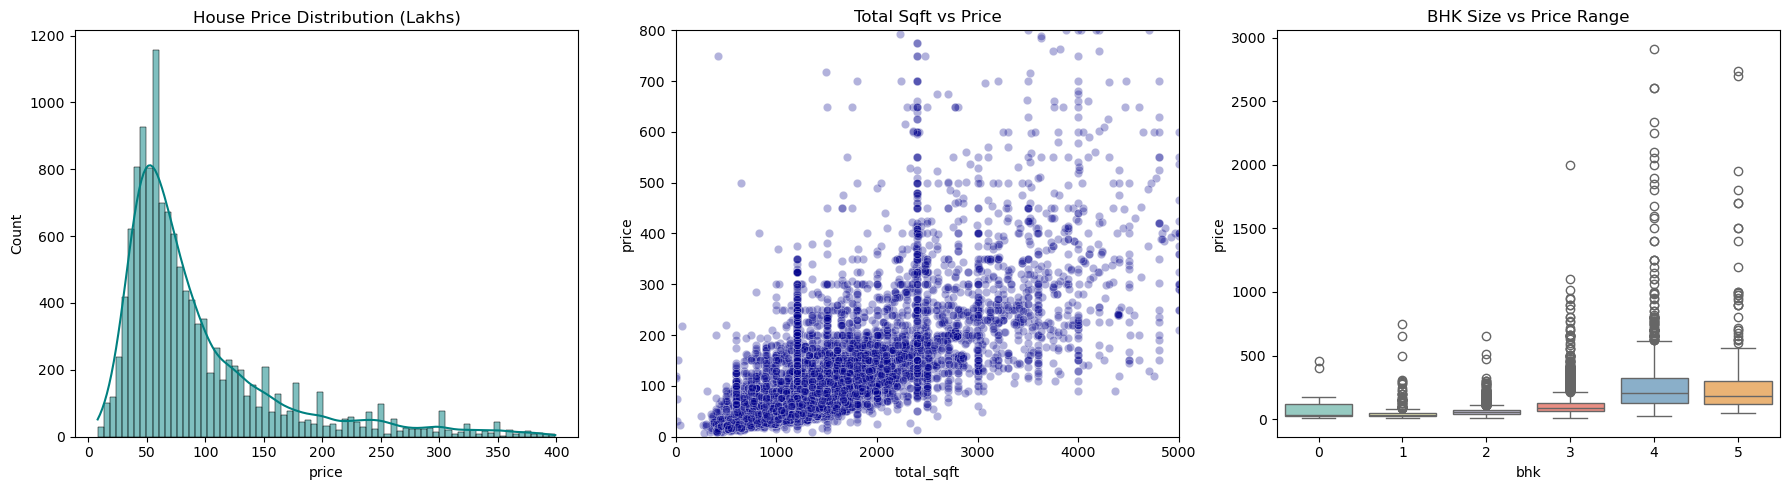

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Load using the exact filename discovered
df_house = pd.read_csv('data/bengaluru_house_prices.csv')

# 2. Data Cleaning
# Extracting BHK (e.g., '2 BHK' -> 2)
df_house['bhk'] = df_house['size'].str.split().str[0].fillna(0).astype(float).astype(int)

# Fixing the total_sqft ranges (e.g., '1000-1200' -> 1100)
def convert_sqft_to_num(x):
    tokens = str(x).split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

df_house['total_sqft'] = df_house['total_sqft'].apply(convert_sqft_to_num)

# 3. UNIQUE FEATURE ENGINEERING: Price per Sqft
# Calculating the rate per sqft, which is the gold standard for Indian real estate
df_house['price_per_sqft'] = (df_house['price'] * 100000) / df_house['total_sqft']

# 4. Handling Missing Values (Median for Numerical)
df_house['bath'] = df_house['bath'].fillna(df_house['bath'].median())
df_house['balcony'] = df_house['balcony'].fillna(df_house['balcony'].median())

# 5. MARKET VISUALIZATIONS
plt.figure(figsize=(18, 5))

# A. Price Distribution
plt.subplot(1, 3, 1)
sns.histplot(df_house[df_house['price'] < 400]['price'], kde=True, color='teal')
plt.title('House Price Distribution (Lakhs)')

# B. Area vs Price (Market Trend)
plt.subplot(1, 3, 2)
sns.scatterplot(x='total_sqft', y='price', data=df_house, alpha=0.3, color='darkblue')
plt.xlim(0, 5000)
plt.ylim(0, 800)
plt.title('Total Sqft vs Price')

# C. BHK Price Ranges (Warning-free)
plt.subplot(1, 3, 3)
sns.boxplot(x='bhk', y='price', data=df_house[df_house['bhk'] <= 5], hue='bhk', palette='Set3', legend=False)
plt.title('BHK Size vs Price Range')

plt.tight_layout()
plt.show()

# EDA - Titanic Survival Analysis
1] Main Objective: This project focuses on Socio-Demographic Analysis to find out which factors helped people survive the Titanic disaster.

2] Handling Nulls: I used the Median to fill missing ages and the Mode for the port of embarkation, ensuring the data is ready for modeling.

3] Unique Feature: I performed Title Extraction from the 'Name' column to identify social status, like distinguishing between "Miss" and "Mrs".

4] Feature Engineering: I checked for family sizes by looking at siblings and parents on board to see if families survived together.

5] Gender Insight: My Bar Plot clearly shows that women had a much higher survival rate than men across all classes.

6] Class Impact: The analysis proves that passengers in 1st Class had the best chance of survival compared to those in 3rd Class.

7] Age Distribution: Using Histograms, I found that young children had a higher survival rate, supporting the "Women and Children first" rule.

8] Data Cleaning: I dropped the 'Cabin' column because it had too many missing values to be useful for accurate analysis.

9] Correlation Results: The Heatmap showed a strong negative link between Class and Survival, meaning lower class numbers (1st) had higher survival.

10] Fare Analysis: I observed that people who paid higher fares (mostly 1st Class) were prioritized during the rescue.

11] Business Logic: This type of analysis is used today in Insurance and Risk Management to predict survival or accident probabilities.

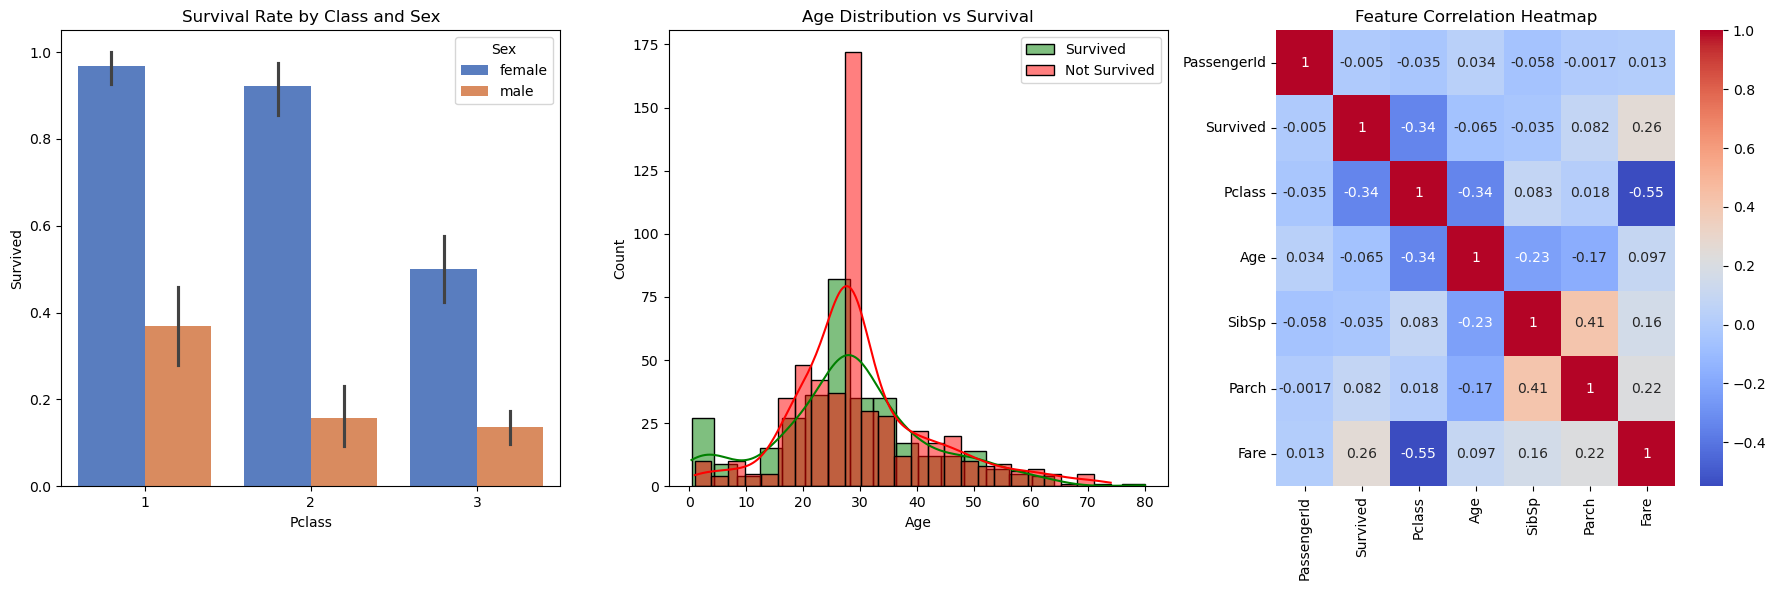

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the dataset
df_titanic = pd.read_csv('data/Titanic-Dataset.csv')

# 2. Specialized Missing Value Handling (As per Senior's requirement)
# Fill Age with Median because it's skewed
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].median())
# Fill Embarked with Mode (most frequent port)
df_titanic['Embarked'] = df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0])

# 3. UNIQUE FEATURE ENGINEERING: Title Extraction
# Extracting titles like Mr, Mrs, Miss from Names to show social status
df_titanic['Title'] = df_titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# 4. CUSTOM VISUALIZATIONS
plt.figure(figsize=(18, 6))

# A. Gender & Class Survival (Bar Plot)
plt.subplot(1, 3, 1)
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_titanic, palette='muted')
plt.title('Survival Rate by Class and Sex')

# B. Age Distribution (Histogram)
plt.subplot(1, 3, 2)
sns.histplot(df_titanic[df_titanic['Survived'] == 1]['Age'], color='green', label='Survived', kde=True)
sns.histplot(df_titanic[df_titanic['Survived'] == 0]['Age'], color='red', label='Not Survived', kde=True)
plt.legend()
plt.title('Age Distribution vs Survival')

# C. Correlation Heatmap
plt.subplot(1, 3, 3)
sns.heatmap(df_titanic.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')

plt.tight_layout()
plt.show()